Pre-visualization of the normalized count data before any differential analysis

# Load

## Libraries and functions

In [ ]:
source("install_libraries.R")

In [1]:
source("load_libraries.R")

*
*  Package WGCNA 1.63 loaded.
*
*    Important note: It appears that your system supports multi-threading,
*    but it is not enabled within WGCNA in R. 
*    To allow multi-threading within WGCNA with all available cores, use 
*
*          allowWGCNAThreads()
*
*    within R. Use disableWGCNAThreads() to disable threading if necessary.
*    Alternatively, set the following environment variable on your system:
*
*          ALLOW_WGCNA_THREADS=<number_of_processors>
*
*    for example 
*
*          ALLOW_WGCNA_THREADS=4
*
*    To set the environment variable in linux bash shell, type 
*
*           export ALLOW_WGCNA_THREADS=4
*
*     before running R. Other operating systems or shells will
*     have a similar command to achieve the same aim.
*


Allowing multi-threading with up to 4 threads.


preparing gene to GO mapping data...
preparing IC data...
preparing gene to GO mapping data...
preparing IC data...
preparing gene to GO mapping data...
preparing IC data...


In [47]:
source("functions.R")

## Data

In [3]:
load("../results/dge/norm_counts.RData")

In [4]:
head(norm_counts)

GF_104w_F_1_2 GF_104w_F_2_2 GF_104w_F_3_2 GF_104w_M_1_2
0610005C13Rik    0.0000        0.00000       0.0000        1.768593  
Erg28          868.4015      749.64927     910.3535      886.064952  
0610009B22Rik 1021.3276     1169.19730    1180.9991     1224.750457  
0610009L18Rik   28.2185       36.20465      18.2253       20.338816  
0610009O20Rik  217.5555      278.98879     266.0893      226.379868  
0610010B08Rik    0.0000        0.00000       0.0000        0.000000  
              GF_104w_M_2_2 GF_52w_M_1_2 GF_52w_M_2_2 GF_52w_M_3_2 GF_52w_M_4_2
0610005C13Rik    1.259244      0.8418979   4.942785      5.603216    7.231584  
Erg28          992.913601    508.5063502 530.855142    514.375197  738.344705  
0610009B22Rik 1558.313990   1038.9020466 876.850113   1016.423320  877.914273  
0610009L18Rik   38.406931     31.9921214  26.691041     22.412863    4.338950  
0610009O20Rik  271.996624    299.7156634 349.949200    395.587025  309.511786  
0610010B08Rik    0.000000      0.0000000   0.000000      0.000000    0.000000  
              GF_8w_M_1_2 ⋯ SPF_104w_M_14_2 SPF_8w_F_1_2 SPF_8w_F_3_2
0610005C13Rik   8.47277   ⋯    5.28524         3.500355     2.112002 
Erg28         603.98749   ⋯  692.36648       763.077332   744.480801 
0610009B22Rik 948.95029   ⋯ 1206.79653      1268.295198  1164.769254 
0610009L18Rik  61.73018   ⋯   45.80542        42.004257    45.408049 
0610009O20Rik 360.69794   ⋯  178.81730       274.194454   252.384272 
0610010B08Rik   0.00000   ⋯    0.00000         0.000000     0.000000 
              SPF_8w_F_4_2 SPF_8w_F_5_2 GF_8w_F_1_2 GF_8w_F_2_2 GF_8w_F_3_2
0610005C13Rik    2.602398     0.00000     18.24998     0.00000     2.025447
Erg28          908.237050   957.79030    898.54336   682.26034   612.697796
0610009B22Rik 1295.994415  1446.89758   1040.24912  1020.67017  1142.352254
0610009L18Rik  102.794738    72.02239     48.30878    19.58642    11.139960
0610009O20Rik  227.709862   184.89330    231.88216   158.86764   271.409933
0610010B08Rik    0.000000     0.00000      0.00000     0.00000     0.000000
              GF_8w_F_4_2 GF_8w_F_5_2
0610005C13Rik   5.268672     0.00000 
Erg28         593.252445   809.27852 
0610009B22Rik 959.952003  1094.00091 
0610009L18Rik  45.310578    24.36813 
0610009O20Rik 304.529230   269.33199 
0610010B08Rik   0.000000     0.00000

# Sample clustering

In [5]:
col_order = colnames(norm_counts)
col_order_metadata = t(sapply(sapply(col_order, strsplit, split = "_"), unlist))
col_order_metadata = col_order_metadata[,c(-4,-5)]
colnames(col_order_metadata) = c("type", "age", "gender")
colors = cbind(col_order_metadata[,3],col_order_metadata[,2],col_order_metadata[,1])
color_SPF = rgb(204,85,79, maxColorValue=255)
color_GF = rgb(107,140,206, maxColorValue=255)
color_104w = rgb(143,98,202, maxColorValue=255)
color_52w = rgb(193,136,63, maxColorValue=255)
color_8w = rgb(74,171,131, maxColorValue=255)
color_F = rgb(126,163,66, maxColorValue=255)
color_M = rgb(199,93,156, maxColorValue=255)
colors[,3] = replace(colors[,3],colors[,3] == "SPF", color_SPF)
colors[,3] = replace(colors[,3],colors[,3] == "GF", color_GF)
colors[,2] = replace(colors[,2],colors[,2] == "104w",color_104w)
colors[,2] = replace(colors[,2],colors[,2] == "52w",color_52w)
colors[,2] = replace(colors[,2],colors[,2] == "8w",color_8w)
colors[,1] = replace(colors[,1],colors[,1] == "F",color_F)
colors[,1] = replace(colors[,1],colors[,1] == "M",color_M)

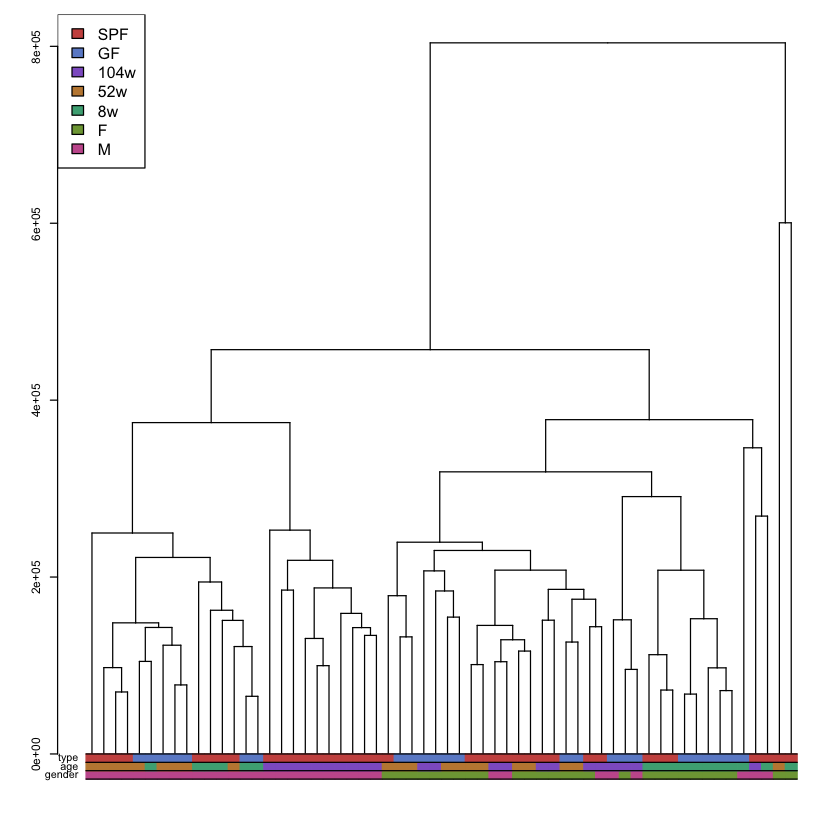

In [6]:
sampleTree = as.dendrogram(hclust(dist(t(norm_counts)), method = "average"))
par(mar = c(4,4,1,1))
par(cex = 0.6)
plot(sampleTree, leaflab="none")
colored_bars(colors, sampleTree, rowLabels = c("gender", "age","type"),y_shift=0.5)
legend("topleft",
        fill=c(color_SPF,color_GF,color_104w,color_52w,color_8w,color_F,color_M),
        c("SPF","GF","104w","52w","8w","F","M"),
        cex=0.8)

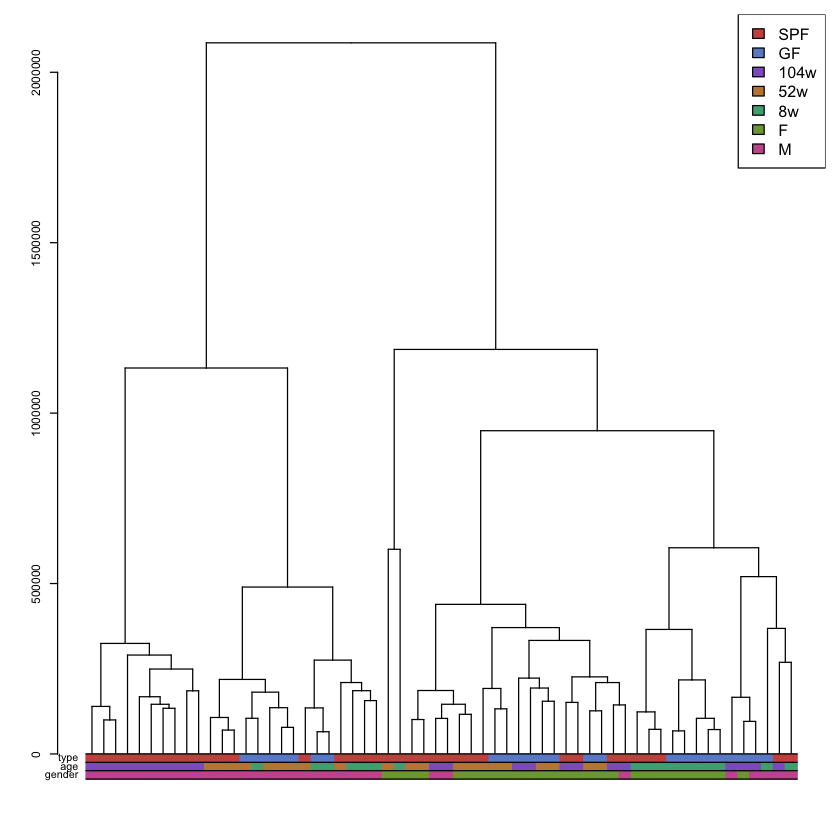

In [7]:
sampleTree = as.dendrogram(hclust(dist(t(norm_counts)), method = "ward.D2"))
par(mar = c(4,4,1,1))
par(cex = 0.6)
plot(sampleTree, leaflab="none")
colored_bars(colors, sampleTree, rowLabels = c("gender", "age","type"),y_shift=0.5)
legend("topright",
        fill=c(color_SPF,color_GF,color_104w,color_52w,color_8w,color_F,color_M),
        c("SPF","GF","104w","52w","8w","F","M"),
        cex=0.8)

# Gene co-expression network analysis


## Build network

In [27]:
# Filter genes that have a count > 10 in more than 90% of the samples
dim(norm_counts)
to_keep = rownames(norm_counts)[which(rowSums(norm_counts > 10)>0.9*dim(norm_counts)[2])]
filtered_norm_counts = norm_counts[to_keep,]
dim(filtered_norm_counts)
gene_names = rownames(filtered_norm_counts)

[1] 24421    60

[1] 10219    60

pickSoftThreshold: will use block size 4378.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 4378 of 10219
   ..working on genes 4379 through 8756 of 10219
   ..working on genes 8757 through 10219 of 10219
   Power SFT.R.sq  slope truncated.R.sq  mean.k. median.k.  max.k.
1      2    0.144 -0.617          0.901 644.0000  6.20e+02 1390.00
2      4    0.691 -1.460          0.964 114.0000  9.21e+01  438.00
3      6    0.783 -1.840          0.970  31.1000  1.94e+01  198.00
4      8    0.790 -2.020          0.962  11.0000  5.03e+00  106.00
5     10    0.832 -1.990          0.985   4.6100  1.49e+00   63.10
6     12    0.851 -1.960          0.988   2.1900  4.90e-01   40.10
7     14    0.876 -1.890          0.988   1.1500  1.72e-01   26.70
8     16    0.886 -1.820          0.971   0.6430  6.43e-02   18.40
9     18    0.899 -1.780          0.970   0.3830  2.50e-02   13.60
10    20    0.882 -1.770          0.946   0.2400  1.02e-02   10.40
11    22

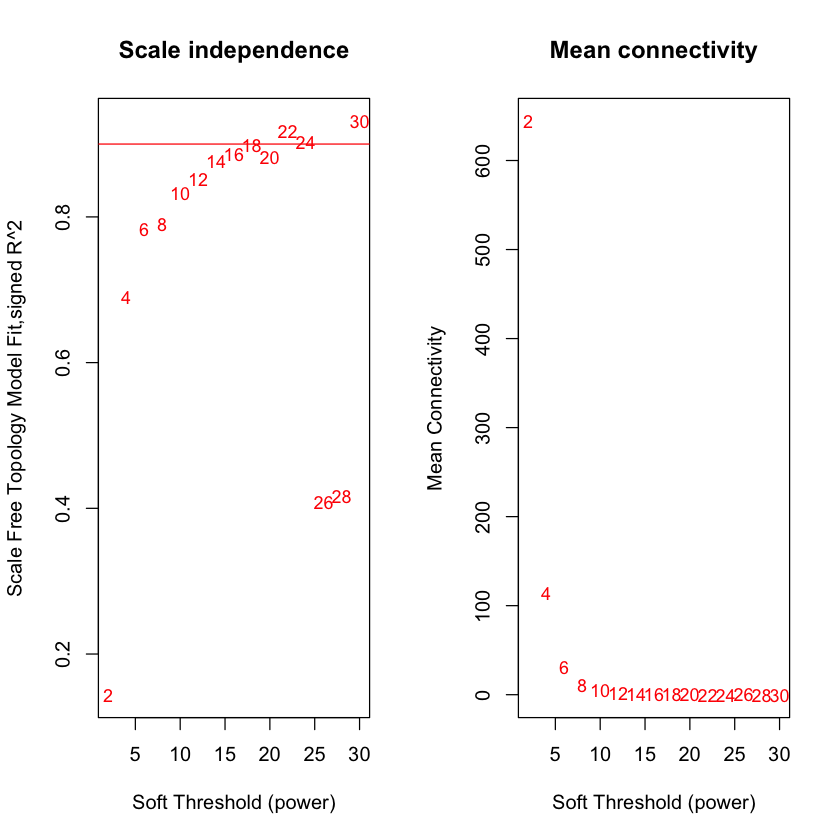

In [6]:
# Choosing the soft-thresholding power
powers = seq(from = 2, to=30, by=2)
sft = pickSoftThreshold(t(filtered_norm_counts), powerVector = powers, verbose = 5)
par(mfrow = c(1,2))
cex1 = 0.9
# Scale-free topology fit index as a function of the soft-thresholding power
plot(sft$fitIndices[,1],
     -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
     xlab="Soft Threshold (power)",
     ylab="Scale Free Topology Model Fit,signed R^2",
     type="n",
     main = paste("Scale independence"))
text(sft$fitIndices[,1],
     -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
     labels=powers,
     cex=cex1,
     col="red");
# this line corresponds to using an R^2 cut-off of h
abline(h=0.90,col="red")
# Mean connectivity as a function of the soft-thresholding power
plot(sft$fitIndices[,1],
     sft$fitIndices[,5],
     xlab="Soft Threshold (power)",
     ylab="Mean Connectivity",
     type="n",
     main = paste("Mean connectivity"))
text(sft$fitIndices[,1], sft$fitIndices[,5], labels=powers, cex=cex1,col="red")

Parameters for network construction
- Soft-thresholding power parameter: 16
- Minimum module size: 25
- Height for module merging: 0.2 (below)
- Biweight Midcorrelation

In [6]:
soft_thresholding_power = 16

In [8]:
head(t(filtered_norm_counts))

Erg28    0610009B22Rik 0610009L18Rik 0610009O20Rik 0610010F05Rik
GF_104w_F_1_2 868.4015 1021.328      28.21850      217.5555      411.4439     
GF_104w_F_2_2 749.6493 1169.197      36.20465      278.9888      461.0769     
GF_104w_F_3_2 910.3535 1180.999      18.22530      266.0893      288.8709     
GF_104w_M_1_2 886.0650 1224.750      20.33882      226.3799      278.5534     
GF_104w_M_2_2 992.9136 1558.314      38.40693      271.9966      304.1073     
GF_52w_M_1_2  508.5064 1038.902      31.99212      299.7157      392.3244     
              0610010K14Rik Mettl26  0610012G03Rik 0610030E20Rik 0610037L13Rik
GF_104w_F_1_2 1351.757      283.0953 693.6289       899.3508     449.6754     
GF_104w_F_2_2 1516.336      207.6443 686.8236       759.2329     526.0323     
GF_104w_F_3_2 1852.601      222.3486 868.4353       540.3800     444.6972     
GF_104w_M_1_2 1551.056      190.1237 823.2799       525.2720     607.5116     
GF_104w_M_2_2 1911.532      243.0340 778.8422       707.6949     586.8075     
GF_52w_M_1_2  1173.606      182.6919 589.3286      1047.3210     621.3207     
              ⋯ Zw10     Zwint    Zxda     Zxdb     Zxdc      Zyg11b   Zyx     
GF_104w_F_1_2 ⋯ 618.0761 1471.913 297.6596 130.1692  923.9282 1333.552 2864.633
GF_104w_F_2_2 ⋯ 797.5672 1539.763 243.8490 198.0607  981.7850 1340.637 3358.514
GF_104w_F_3_2 ⋯ 731.7456 1375.099 153.0925 171.3178  922.1999 1181.910 3058.205
GF_104w_M_1_2 ⋯ 466.9085 1752.675 172.4378 344.8756  683.5611 1295.494 2789.955
GF_104w_M_2_2 ⋯ 878.3224 1957.494 147.9611 249.3302 1003.6172 1205.726 2819.446
GF_52w_M_1_2  ⋯ 768.6528 1397.551 287.9291 275.3006  924.4039 1674.535 2206.614
              Zzef1    Zzz3      Hikeshi 
GF_104w_F_1_2 396.8795  752.7967 668.1412
GF_104w_F_2_2 364.1762  597.3768 703.8610
GF_104w_F_3_2 209.5909  644.2642 770.9300
GF_104w_M_1_2 261.7517  944.4285 687.9826
GF_104w_M_2_2 200.8494  785.1384 583.6594
GF_52w_M_1_2  749.2892 1163.5029 493.3522

In [7]:
# Block-wise network construction and module detection
bwnet = blockwiseModules(t(filtered_norm_counts),
                 checkMissingData = TRUE,
                 maxBlockSize = 5000,
                 power = soft_thresholding_power,
                 TOMType = "signed",
                 numericLabels = TRUE,
                 saveTOMs = TRUE,
                 saveTOMFileBase = "norm_genes_TOM",
                 mergeCutHeight = 0.2, 
                 verbose=3,
                 corType="bicor",
                 maxPOutliers=0,
                 minModuleSize = 30)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ....pre-clustering genes to determine blocks..
   Projective K-means:
   ..k-means clustering..
   ..merging smaller clusters...
Block sizes:
gBlocks
   1    2    3 
4997 4015 1207 
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will use 4 parallel threads.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file norm_genes_TOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
 ..Working on block 2 .
    TOM calculation: adjacency..
    ..will use 4 parallel threads.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 2 into fi

In [8]:
# Modules
table(bwnet$colors)
module_nb = dim(table(bwnet$colors))-1
module_nb


   0    1    2    3    4    5    6    7    8    9   10   11 
8786  446  260  191   95   93   86   62   56   53   49   42 

[1] 11

- 11 modules with between 42 and 446 genes 
- 8786 genes not assigned to a module

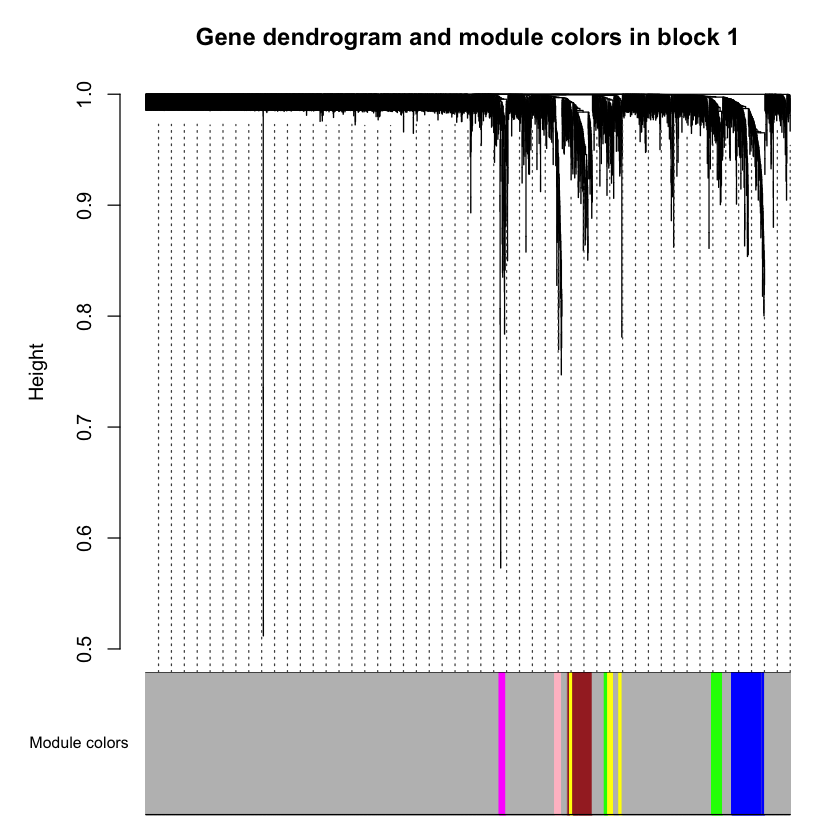

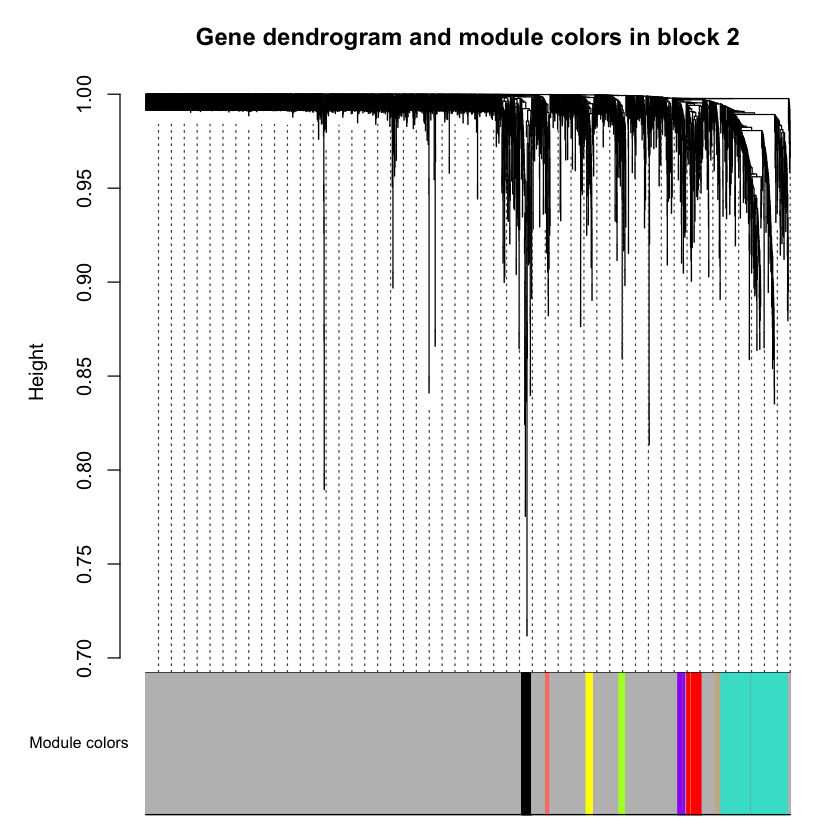

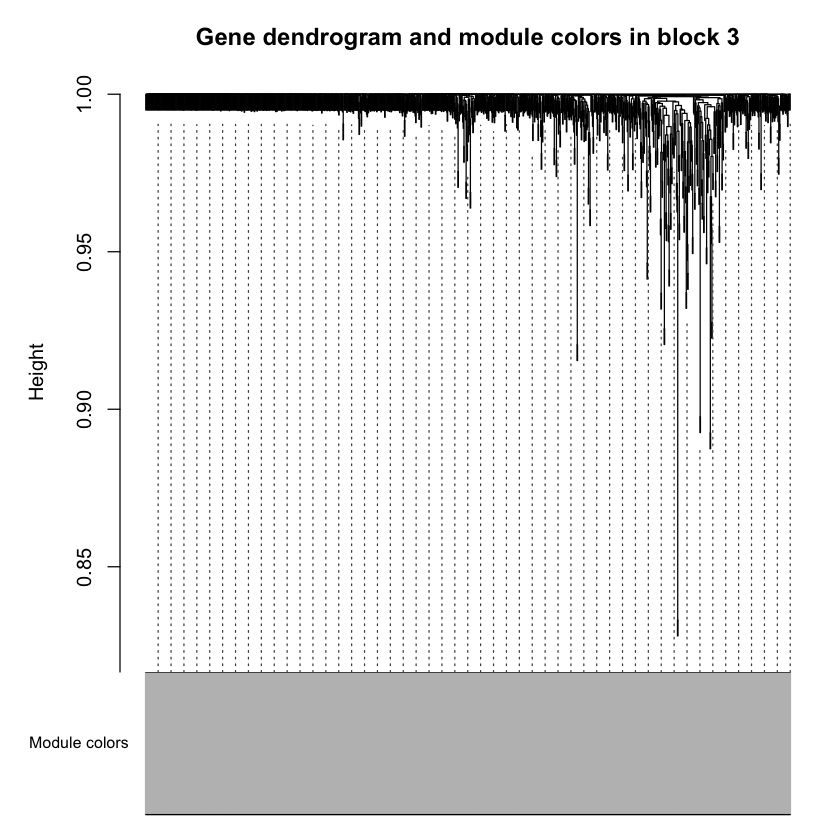

In [14]:
# Plot the dendrogram and the module colors underneath for the 3 blocks
bwModuleColors = labels2colors(bwnet$colors)
plotDendroAndColors(bwnet$dendrograms[[1]],
                    bwModuleColors[bwnet$blockGenes[[1]]],
                    "Module colors",
                    main = "Gene dendrogram and module colors in block 1",
                    dendroLabels = FALSE,
                    hang = 0.03,
                    addGuide = TRUE,
                    guideHang = 0.05)
plotDendroAndColors(bwnet$dendrograms[[2]],
                    bwModuleColors[bwnet$blockGenes[[2]]],
                    "Module colors",
                    main = "Gene dendrogram and module colors in block 2",
                    dendroLabels = FALSE,
                    hang = 0.03,
                    addGuide = TRUE,
                    guideHang = 0.05)
plotDendroAndColors(bwnet$dendrograms[[3]],
                    bwModuleColors[bwnet$blockGenes[[3]]],
                    "Module colors",
                    main = "Gene dendrogram and module colors in block 3",
                    dendroLabels = FALSE,
                    hang = 0.03,
                    addGuide = TRUE,
                    guideHang = 0.05)

In [29]:
# Get genes that are in one module
in_mod = is.finite(match(bwnet$colors, seq(1:module_nb)))
mod_genes = gene_names[in_mod]
length(mod_genes)
sum(in_mod)

[1] 1433

[1] 1433

## Network visualization

In [9]:
# Get the Topological Overlap Matrix (TOM)
TOM = TOMsimilarityFromExpr(t(filtered_norm_counts), power = soft_thresholding_power)

TOM calculation: adjacency..
..will use 4 parallel threads.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


In [12]:
# Filter TOM for the genes in the modules
mod_TOM = TOM[in_mod, in_mod]
dimnames(mod_TOM) = list(mod_genes, mod_genes)
#mod_TOM = TOM
#gene_names = rownames(filtered_norm_counts)
#dimnames(mod_TOM) = list(gene_names,gene_names)

In [13]:
# Transform into adjency matrix while keeping gene connection if the value > 0.005
adjency = (as.matrix(mod_TOM)>0.005)*1
head(adjency)

0610030E20Rik 1600020E01Rik Zfp974 1700094D03Rik Lrmda
0610030E20Rik 1             1             0      0             0    
1600020E01Rik 1             1             0      1             0    
Zfp974        0             0             1      0             0    
1700094D03Rik 0             1             0      1             0    
Lrmda         0             0             0      0             1    
1810026B05Rik 1             1             0      1             0    
              1810026B05Rik Ndufaf8 2010107E04Rik 2210016L21Rik 2310033P09Rik ⋯
0610030E20Rik 1             0       0             0             0             ⋯
1600020E01Rik 1             0       0             0             0             ⋯
Zfp974        0             0       0             0             0             ⋯
1700094D03Rik 1             0       0             0             0             ⋯
Lrmda         0             0       0             0             0             ⋯
1810026B05Rik 1             0       0             0             0             ⋯
              Zmpste24 Zmym6 Znhit2 Znrd1 Znrf1 Znrf2 Zrsr2 Zscan26 Zswim8
0610030E20Rik 0        0     0      0     0     0     0     1       0     
1600020E01Rik 0        1     0      0     1     0     0     1       1     
Zfp974        0        0     1      0     0     0     0     0       0     
1700094D03Rik 0        1     0      0     0     0     0     1       0     
Lrmda         0        0     0      0     0     0     0     0       0     
1810026B05Rik 0        1     0      0     1     0     0     1       1     
              Zzef1
0610030E20Rik 0    
1600020E01Rik 0    
Zfp974        0    
1700094D03Rik 0    
Lrmda         0    
1810026B05Rik 0

In [14]:
# Transform adjency matrix into network
net = graph_from_adjacency_matrix(adjency, diag = FALSE, weighted = TRUE, mode="undirected")
save(net, file = "../results/dge/dge_net.RData")

In [69]:
# Get node colors = module color
mod_colors = bwnet$colors
names(mod_colors) = gene_names
#head(mod_colors)
connected_gene_colors = mod_colors[in_mod]
save(connected_gene_colors, file = "../results/dge/dge_net_connected_gene_colors.RData")

In [16]:
pal2 = c("#c15942",
"#7ecf56",
"#844ac1",
"#cdb353",
"#c95393",
"#8cc9ae",
"#4e304c",
"#57623c",
"#9598c3")
pal2 = c("#c64944",
"#72d367",
"#8f4bcb",
"#c9ce4e",
"#be5395",
"#5a7940",
"#797dbb",
"#c3823b",
"#79c4c0",
"#6a5352",
"#d2b9a0")
save(pal2, file = "../results/dge/dge_net_pal2.RData")

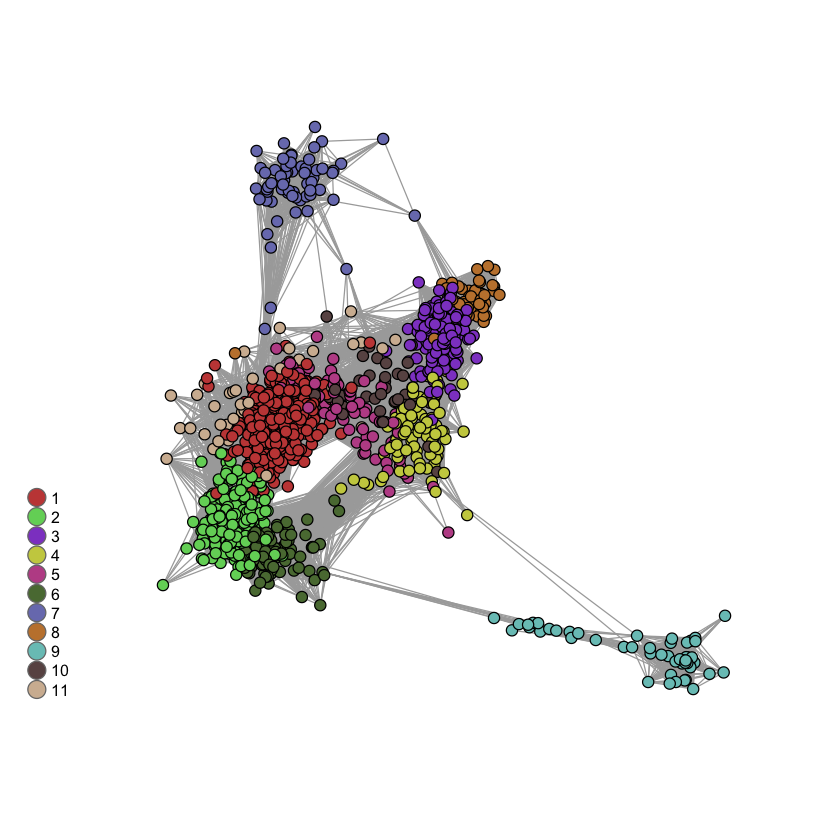

In [32]:
# Plot network
layout = layout_with_fr(net)
plot(net, 
     vertex.label=NA,
     vertex.size=4,
     vertex.color=pal2[connected_gene_colors],
     layout=layout)
legend(x=-1.5, y=-0.25, 1:module_nb, pch=21,col="#777777", pt.bg=pal2, pt.cex=2, cex=.8, bty="n", ncol=1)
#layout = layout_with_fr(net)
#save(layout, file = "../results/dge/dge_layout.RData")

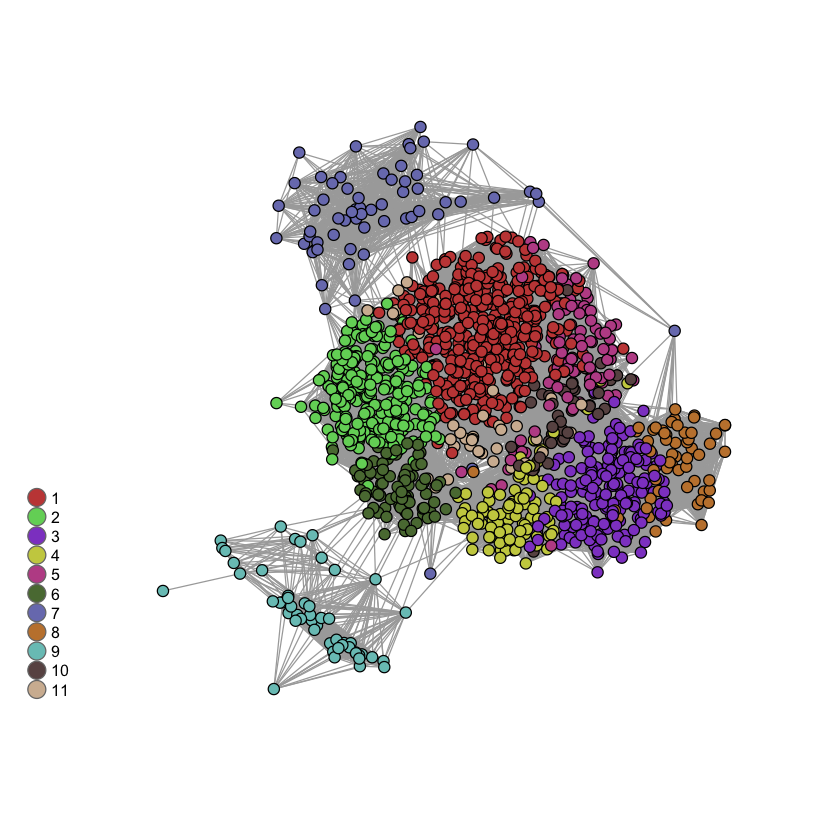

In [37]:
# Plot network
layout = layout_with_kk(net)
plot(net, 
     vertex.label=NA,
     vertex.size=4,
     vertex.color=pal2[mod_colors],
     layout=layout)
legend(x=-1.5, y=-0.25, 1:module_nb, pch=21,col="#777777", pt.bg=pal2, pt.cex=2, cex=.8, bty="n", ncol=1)
save(layout, file = "../results/dge/dge_layout.RData")

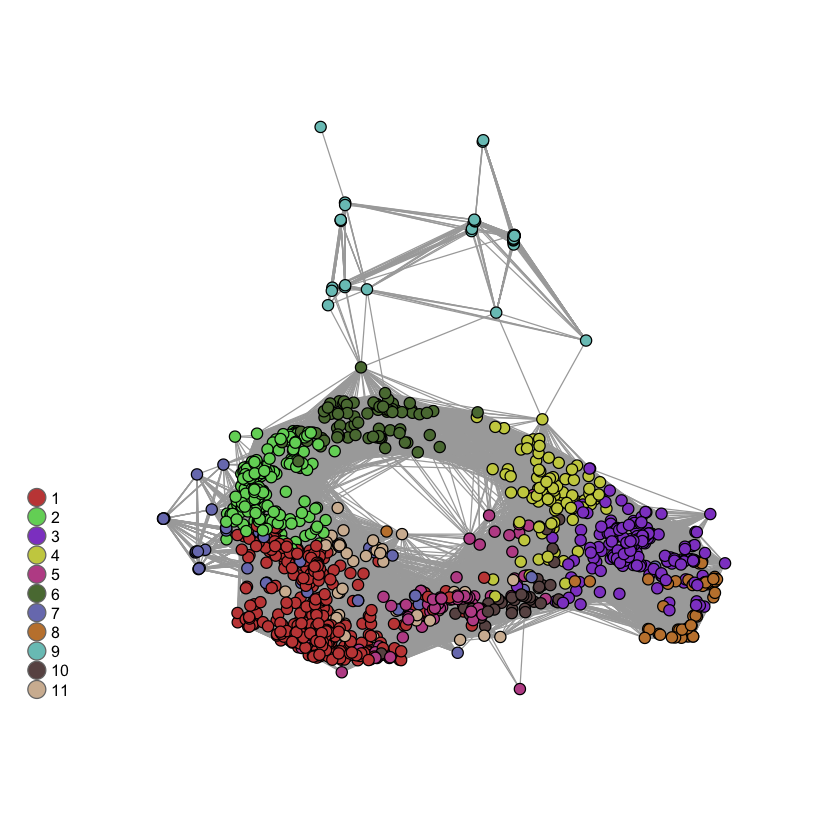

In [34]:
# Plot network
layout = layout_with_mds(net)
plot(net, 
     vertex.label=NA,
     vertex.size=4,
     vertex.color=pal2[mod_colors],
     layout=layout)
legend(x=-1.5, y=-0.25, 1:module_nb, pch=21,col="#777777", pt.bg=pal2, pt.cex=2, cex=.8, bty="n", ncol=1)

## Module analysis

In [36]:
module_genes = names(connected_gene_colors)[which(connected_gene_colors == 1)]
length(module_genes)

[1] 446

In [40]:
for(i in 1:module_nb){
    print(i)
    module_genes = names(connected_gene_colors)[which(connected_gene_colors == i)]
    module_gene_bool = all_genes %in% module_genes
    names(module_gene_bool) = all_genes
    head(module_gene_bool)
    pwf = suppressMessages(nullp(module_gene_bool, 'mm10', 'geneSymbol', plot.fit=F))                        
    GO_wall = goseq(pwf,'mm10', 'geneSymbol')
    adj_GO_wall = GO_wall[p.adjust(GO_wall[,"over_represented_pvalue"],method="BH")<.05,]
    print(head(adj_GO_wall))
    print(head(adj_GO_wall[adj_GO_wall$ontology == "BP",]))
}

[1] 1


Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”Fetching GO annotations...
For 2874 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


        category over_represented_pvalue under_represented_pvalue numDEInCat
11757 GO:0044446            3.822525e-17                        1        234
3148  GO:0006325            1.691165e-16                        1         59
11744 GO:0044428            1.407598e-15                        1        157
11740 GO:0044422            2.439226e-15                        1        235
13920 GO:0051276            1.389881e-14                        1         69
11225 GO:0043231            1.518125e-14                        1        295
      numInCat                                     term ontology
11757     6649             intracellular organelle part       CC
3148       723                   chromatin organization       BP
11744     3692                             nuclear part       CC
11740     6888                           organelle part       CC
13920     1058                  chromosome organization       BP
11225     9758 intracellular membrane-bounded organelle       CC
      

Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”Fetching GO annotations...
For 2874 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


        category over_represented_pvalue under_represented_pvalue numDEInCat
5178  GO:0012505            7.896233e-25                        1        124
8223  GO:0031984            7.378768e-23                        1         55
11755 GO:0044444            5.786768e-18                        1        173
8221  GO:0031982            7.228745e-18                        1        112
2833  GO:0005783            2.316476e-17                        1         67
18199 GO:0098827            1.247675e-16                        1         35
      numInCat                                 term ontology
5178      3583                  endomembrane system       CC
8223       802             organelle subcompartment       CC
11755     7712                     cytoplasmic part       CC
8221      3918                              vesicle       CC
2833      1558                endoplasmic reticulum       CC
18199      456 endoplasmic reticulum subcompartment       CC
        category over_represented_

Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Fetching GO annotations...
For 2874 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


        category over_represented_pvalue under_represented_pvalue numDEInCat
11766 GO:0044455            2.712250e-58                        1         55
2801  GO:0005743            2.975123e-56                        1         64
6727  GO:0019866            5.893037e-55                        1         64
2798  GO:0005740            1.130974e-54                        1         70
18184 GO:0098800            1.580494e-53                        1         47
11225 GO:0043231            2.212897e-53                        1        167
      numInCat                                         term ontology
11766      185                  mitochondrial membrane part       CC
2801       401                 mitochondrial inner membrane       CC
6727       442                     organelle inner membrane       CC
2798       606                       mitochondrial envelope       CC
18184      111 inner mitochondrial membrane protein complex       CC
11225     9758     intracellular membrane-bound

Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”Fetching GO annotations...
For 2874 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


[1] category                 over_represented_pvalue  under_represented_pvalue
[4] numDEInCat               numInCat                 term                    
[7] ontology                
<0 rows> (or 0-length row.names)
[1] category                 over_represented_pvalue  under_represented_pvalue
[4] numDEInCat               numInCat                 term                    
[7] ontology                
<0 rows> (or 0-length row.names)
[1] 5


Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”Fetching GO annotations...
For 2874 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


[1] category                 over_represented_pvalue  under_represented_pvalue
[4] numDEInCat               numInCat                 term                    
[7] ontology                
<0 rows> (or 0-length row.names)
[1] category                 over_represented_pvalue  under_represented_pvalue
[4] numDEInCat               numInCat                 term                    
[7] ontology                
<0 rows> (or 0-length row.names)
[1] 6


Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”Fetching GO annotations...
For 2874 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


        category over_represented_pvalue under_represented_pvalue numDEInCat
11625 GO:0044238            2.036962e-06                0.9999994         62
11624 GO:0044237            2.393820e-06                0.9999992         62
16644 GO:0071704            4.209145e-06                0.9999986         63
3493  GO:0006807            6.113639e-06                0.9999979         59
18998 GO:1901564            6.803428e-06                0.9999976         45
      numInCat                                      term ontology
11625     9197                 primary metabolic process       BP
11624     9220                cellular metabolic process       BP
16644     9689       organic substance metabolic process       BP
3493      8654       nitrogen compound metabolic process       BP
18998     5793 organonitrogen compound metabolic process       BP
        category over_represented_pvalue under_represented_pvalue numDEInCat
11625 GO:0044238            2.036962e-06                0.9999994

Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Fetching GO annotations...
For 2874 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


        category over_represented_pvalue under_represented_pvalue numDEInCat
995   GO:0002252                       0                        1         26
1075  GO:0002376                       0                        1         39
3585  GO:0006952                       0                        1         32
4698  GO:0009897                       0                        1         14
14118 GO:0051607                       0                        1         15
18072 GO:0098552                       0                        1         15
      numInCat                             term ontology
995        651          immune effector process       BP
1075      2168            immune system process       BP
3585      1320                 defense response       BP
4698       309 external side of plasma membrane       CC
14118      202        defense response to virus       BP
18072      499                 side of membrane       CC
        category over_represented_pvalue under_represented_pva

Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Fetching GO annotations...
For 2874 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


       category over_represented_pvalue under_represented_pvalue numDEInCat
15   GO:0000028                       0                        1          7
958  GO:0002181                       0                        1         13
1665 GO:0003676                       0                        1         41
1688 GO:0003723                       0                        1         41
1693 GO:0003729                       0                        1         12
1695 GO:0003735                       0                        1         38
     numInCat                               term ontology
15         19   ribosomal small subunit assembly       BP
958        58            cytoplasmic translation       BP
1665     3418               nucleic acid binding       MF
1688     1569                        RNA binding       MF
1693      213                       mRNA binding       MF
1695      147 structural constituent of ribosome       MF
       category over_represented_pvalue under_represented_pval

Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”Fetching GO annotations...
For 2874 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


[1] category                 over_represented_pvalue  under_represented_pvalue
[4] numDEInCat               numInCat                 term                    
[7] ontology                
<0 rows> (or 0-length row.names)
[1] category                 over_represented_pvalue  under_represented_pvalue
[4] numDEInCat               numInCat                 term                    
[7] ontology                
<0 rows> (or 0-length row.names)
[1] 10


Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”Fetching GO annotations...
For 2874 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


        category over_represented_pvalue under_represented_pvalue numDEInCat
11221 GO:0043227            2.855916e-07                1.0000000         43
11220 GO:0043226            8.367349e-07                0.9999999         44
11223 GO:0043229            1.105497e-06                0.9999998         42
11225 GO:0043231            1.123530e-06                0.9999998         39
8221  GO:0031982            4.139869e-06                0.9999990         23
      numInCat                                     term ontology
11221    11402               membrane-bounded organelle       CC
11220    12318                                organelle       CC
11223    11275                  intracellular organelle       CC
11225     9758 intracellular membrane-bounded organelle       CC
8221      3918                                  vesicle       CC
[1] category                 over_represented_pvalue  under_represented_pvalue
[4] numDEInCat               numInCat                 term           

Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”Fetching GO annotations...
For 2874 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


        category over_represented_pvalue under_represented_pvalue numDEInCat
11748 GO:0044432            7.285038e-09                        1         11
2839  GO:0005789            1.460999e-08                        1         10
18199 GO:0098827            1.939887e-08                        1         10
10678 GO:0042175            2.188852e-08                        1         10
2833  GO:0005783            2.721879e-08                        1         16
8223  GO:0031984            4.433091e-08                        1         12
      numInCat                                                          term
11748      541                                    endoplasmic reticulum part
2839       443                                endoplasmic reticulum membrane
18199      456                          endoplasmic reticulum subcompartment
10678      462 nuclear outer membrane-endoplasmic reticulum membrane network
2833      1558                                         endoplasmic reticulum

In [68]:
graphjs(net,
        layout=layout_with_fr(net, dim=3),
        height=500,
        vertex.size=1,
        vertex.color=as.vector(pal2[connected_gene_colors]),
        vertex.shape="sphere",
        vertex.label=as.vector(names(connected_gene_colors)),
        edge.color="grey")

HTML widgets cannot be represented in plain text (need html)

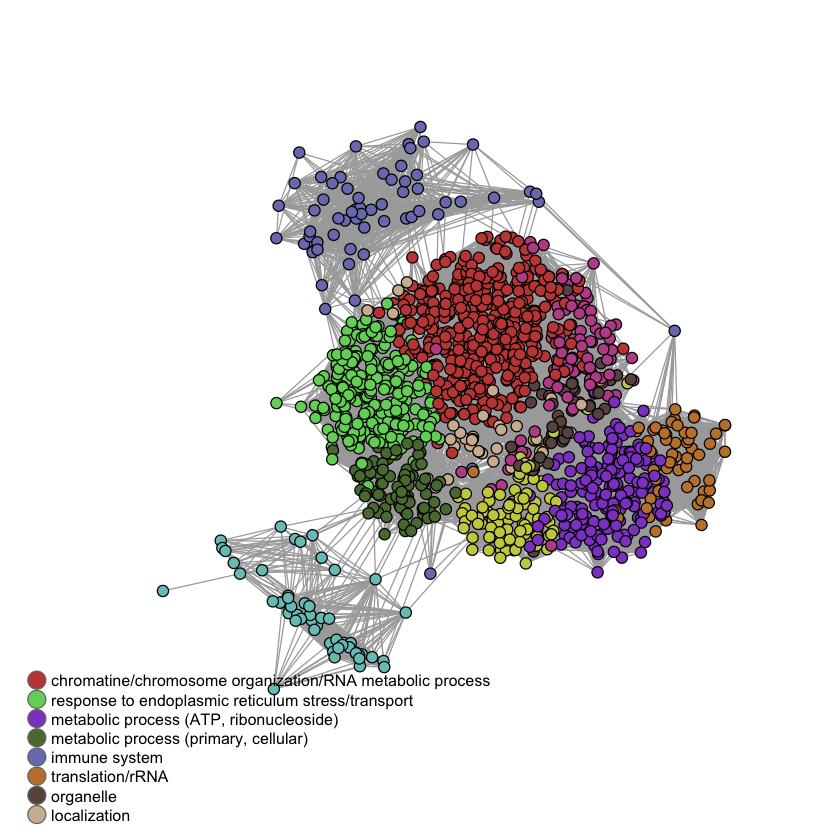

In [48]:
# Plot network
plot_net_with_layout(net, connected_gene_colors, pal2, layout)